In [1]:
import sys
sys.path.append('../')
from primer_design.align_sequence import lines_to_dict,read
import matplotlib.pyplot as plt
import re
from collections import Counter

In [2]:
# load M gene fast files
fluB = '/home/hui/AptitudeUsers/R&D/Users/Hui Kang/flu/InfB_output.fast'
fluA = '/home/hui/AptitudeUsers/R&D/Users/Hui Kang/flu/FluA_genes/InfluenzaA_M1_M2.fa'


In [3]:
# read Influenza A strains and sequences to dictionary
fastA = lines_to_dict(read(fluA))
fluA_genes =  list(fastA.keys())

In [14]:
count = 0
for k,seq in fastA.items():
    if 'AGTGAGCGAGGACTG' in seq:
        count +=1

In [15]:
count

41735

In [16]:
len(fastA)

43097

In [17]:
'AGTGAGCGAGGACTG'.lower()

'agtgagcgaggactg'

In [4]:
# fetch all years from the strains.
year_ptn = re.compile(r'((19|20)\d\d)/\d{0,2}/\d{0,2}')

fluA_years = []
for i in fluA_genes:
    match = year_ptn.search(i)
    if match:
        year = int(match.groups()[0])
        fluA_years.append(year)
        if year<1920:print(i)
    else:
        print(i)

>AY130766 A/Brevig Mission/1/1918 1918// 7 (MP)
>CY146802 A/Texas/JY2/unknown unknown// 7 (MP)
>CY146818 A/PAL/unknown unknown// 7 (MP)
>CY147313 A/Mayo/unknown unknown// 7 (MP)
>CY147391 A/Georgia/JY2/unknown unknown// 7 (MP)


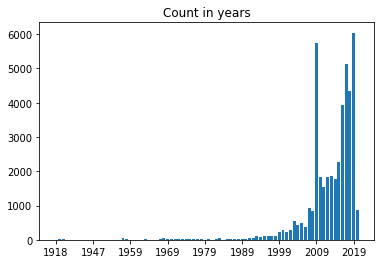

In [8]:
# plot which years are these sequences from.
year_counter = list(Counter(fluA_years).items())
year_counter.sort()
year_counter

labels = [i[0] for i in year_counter]
year_height =  [i[1] for i in year_counter]
x_position = list(range(len(labels)))

fig,ax = plt.subplots()
ax.bar(x_position,year_height,)
ax.set_xticks(x_position[::10])
ax.set_xticklabels(labels[::10], )
ax.set_title('Count in years')
plt.show()

In [10]:
# make a new FastA file of flu A M gene that only contain sequences after year 2009.
sequences = []
uniques={}
for name,seq in fastA.items():
    match = year_ptn.search(name)
    if match:
        year = int(match.groups()[0])
        if year>=2009:
            if seq not in sequences:
                sequences.append(seq)
                uniques[name]=seq

print(f'Total FastA items {len(fastA.keys())}')                
print(f"Unique sequences after 2009: {len(sequences)}")

Total FastA items 43097
Unique sequences after 2009: 12241


In [12]:
#write to fastA file.
with open('fluA_post2009_unique.fasta','wt') as f:
    for name, seq in uniques.items():
        f.write(name+'\n')
        f.write(seq+'\n')

In [1]:
data = open('/home/hui/AptitudeUsers/R&D/Users/Hui Kang/flu/FluA_genes/InfluenzaA_M1_M2.fa').read()

In [2]:
fastAgenes

'>'

In [3]:
data.index('GACTTGAAGATGTCTTTGC')

142